In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('conhecimento_filtrado.csv')
print(len(df))

82053


In [3]:
df1 = df[df.verifica==1].copy()
print(len(df1))
df3 = df[df.verifica==3].copy()
print(len(df3))

12893
58764


In [4]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [5]:
def normaliza(dado):
    mi = dado.min()
    ma = dado.max()
    d = ((dado-mi) / (ma-mi))
    return d
def gera_sumario(df):
    dados = []
    for c in cols:
        d = normaliza(df[c])
        
        dados.append([
            c, # coluna
            d.mean(),   # media
            d.median(), # mediana
            d.std()**2, # variancia
            d.std(),    # std
        ])
    sumario = pd.DataFrame(dados, columns=['coluna', 'media', 'mediana', 'variancia', 'std'])
    sumario = sumario.sort_values('std', ascending=False).copy().reset_index(drop=True)
    return sumario

In [6]:
sumario1 = gera_sumario(df1)
sumario1

,coluna,media,mediana,variancia,std
0,dif_ndvi,0.366613,0.329117,0.033906,0.184137
1,medianb7,0.467894,0.462550,0.028318,0.168280
2,dif_dnbrl,0.261435,0.228920,0.026886,0.163969
3,medianb5,0.496806,0.498345,0.024812,0.157517
4,ndvi,0.444477,0.440315,0.024691,0.157132
5,nbrl,0.476658,0.460639,0.024593,0.156820
6,medianb3,0.373159,0.364238,0.019846,0.140875
7,medianb4,0.386198,0.372567,0.019754,0.140550
8,medianb6,0.419812,0.416517,0.015310,0.123732
9,medianb2,0.281057,0.264648,0.013282,0.115248


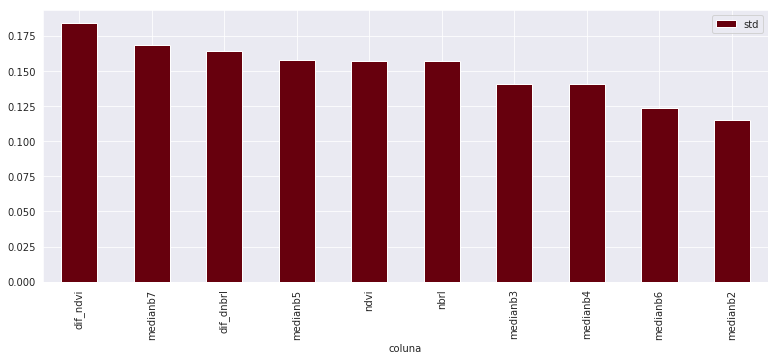

In [7]:
sumario1.plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))

In [8]:
melhor = sumario1.coluna.loc[0]
pior = sumario1.coluna.loc[len(sumario1)-1]

dado discrepante melhor coluna dif_ndvi


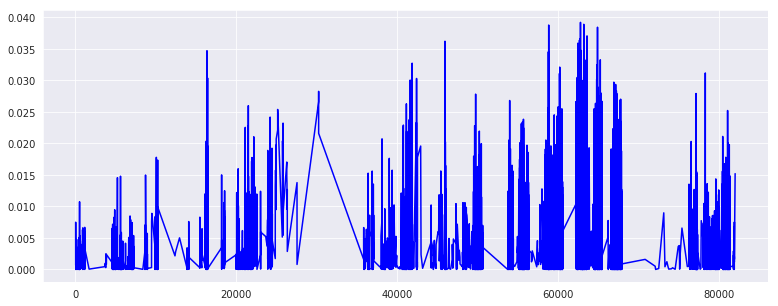

In [9]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
print('dado discrepante melhor coluna', melhor)

dado discrepante pior coluna medianb2


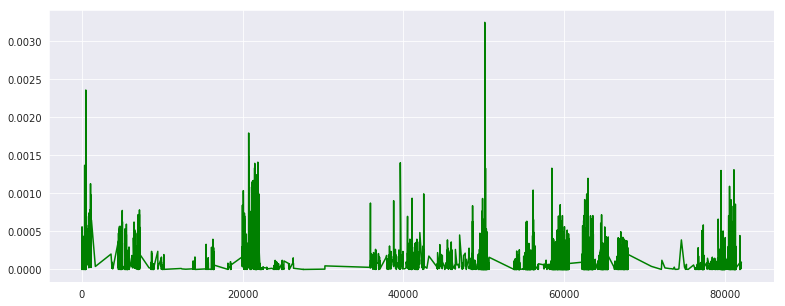

In [10]:
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))
print('dado discrepante pior coluna', pior)

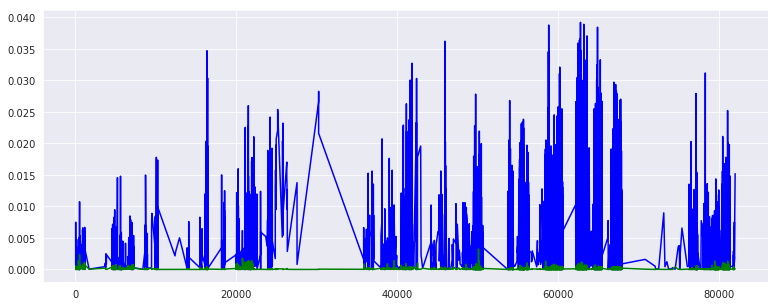

In [11]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))


In [12]:
sumario3 = gera_sumario(df3)
sumario3

,coluna,media,mediana,variancia,std
0,medianb2,0.364615,0.307058,0.055720,0.236050
1,medianb4,0.449724,0.419009,0.044785,0.211625
2,medianb3,0.361702,0.315860,0.041042,0.202588
3,ndvi,0.577456,0.591545,0.028480,0.168760
4,medianb5,0.508093,0.501022,0.025525,0.159767
5,medianb7,0.390953,0.378277,0.024557,0.156708
6,nbrl,0.624681,0.640315,0.022109,0.148691
7,dif_dnbrl,0.315004,0.297313,0.019631,0.140112
8,dif_ndvi,0.359223,0.344641,0.019082,0.138138
9,medianb6,0.454677,0.454799,0.018332,0.135396


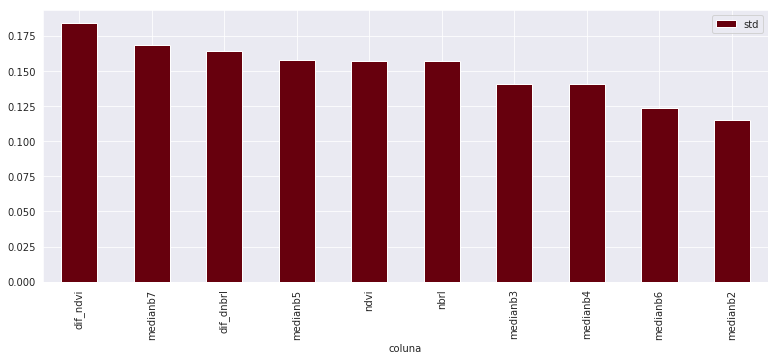

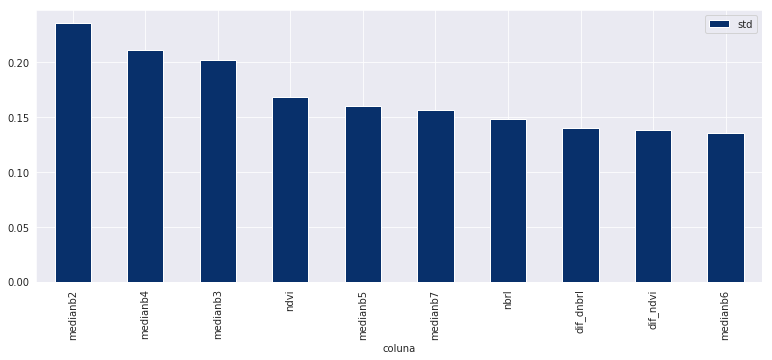

In [13]:
(sumario1).plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))
(sumario3).plot(x="coluna", y=['std'], kind="bar", colormap='Blues_r', figsize=(13,5))